<a href="https://colab.research.google.com/github/Gokulraj1234/DATASCIENCE-LAB/blob/main/(GOKUL_RAJ)_EXP9_HandWrittenDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#load MNIST dataset available in Keras library
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# To Know No. of Examples in Training Dataset

In [ ]:
# No. of examples in train dataset
print("No: of examples X_train=",len(X_train))
# No. of examples in test dataset
print("No: of examples X_test=",len(X_test))

No: of examples X_train= 60000
No: of examples X_test= 10000


In [ ]:
# Give details of an image in the dataset
X_train[0].shape

(28, 28)

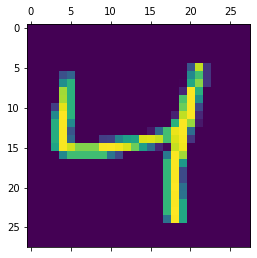

In [ ]:
#matshow() function OR imshow() function is used to represent an array as a matrix in a new figure window. 
#plt.matshow(X_train[0]) OR plt.imshow(X_train[2])
plt.matshow(X_train[2])

In [ ]:
#  Scale the values in Xtrain & Xtest 
X_train = X_train / 255
X_test = X_test / 255
# Display the length of X_train
print("Length of X_train=",len(X_train))
X_train[0]

Length of X_train= 60000


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [ ]:
# Flattening Xtrain & Xtest to a 2D array
X_train_flattened=X_train.reshape(-1,784)
X_test_flattened=X_test.reshape(-1,784)
#Display the shape of flattened Xtrain & Xtest
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [ ]:
#Build the model 
model = keras.Sequential([keras.layers.Dense(10,activation='sigmoid')])
# Apply 'adam' optimizer
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# Train the model using fit(). Give epoch as 10
model.fit(X_train_flattened,y_train,epochs=10)
#Evaluate the model 
model.evaluate(X_test_flattened, y_test)

#Predict the values for flattened test dataset
y_predicted = model.predict(X_test_flattened)
#Display the first row of y_predicted
y_predicted[1]


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1879 - accuracy: 0.5986
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9770 - accuracy: 0.7020
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7908 - accuracy: 0.7390
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6270 - accuracy: 0.7613
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4840 - accuracy: 0.7753
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3603 - accuracy: 0.7869
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2537 - accuracy: 0.7990
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1616 - accuracy: 0.8077
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0821 - accuracy: 0.8154
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.9632 

array([0.3002805 , 0.28543913, 0.71413606, 0.56227523, 0.06628048,
       0.44625446, 0.561068  , 0.03807968, 0.335887  , 0.06170225],
      dtype=float32)

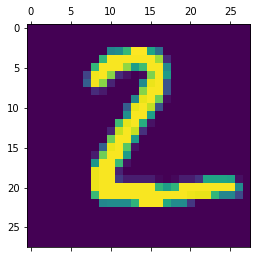

In [ ]:
# Display the predicted value by applying argmax()
np.argmax(y_predicted)
#Confirm the prediction by displaying the corresponding pixel values using matshow() ir imshow()
plt.matshow(X_test[1])


In [ ]:
#Display the predicted values  for test dataset. Display only first 5 predicted values
yPredicted = model.predict(X_test_flattened)
yPredicted[0]
#Construct the Confusion Matrix 
yPredictedLabels = [np.argmax(i) for i in yPredicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions = yPredictedLabels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 929,    1,    4,    8,    0,    6,   23,    1,    8,    0],
       [   0, 1097,    8,    5,    0,    1,    5,    0,   19,    0],
       [  17,   52,  819,   27,   21,    0,   31,   23,   41,    1],
       [   4,   25,   29,  875,    1,    5,    8,   20,   30,   13],
       [   2,   19,    3,    0,  829,    0,   23,    4,    7,   95],
       [  28,   69,    6,  143,   31,  519,   27,   25,   22,   22],
       [  21,   33,   11,    0,   17,   14,  860,    0,    2,    0],
       [   1,   56,   16,    2,   13,    0,    2,  895,    9,   34],
       [  18,   60,   10,   74,   15,    9,   16,   17,  727,   28],
       [  19,   26,    6,   11,   68,    2,    0,   56,   10,  811]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

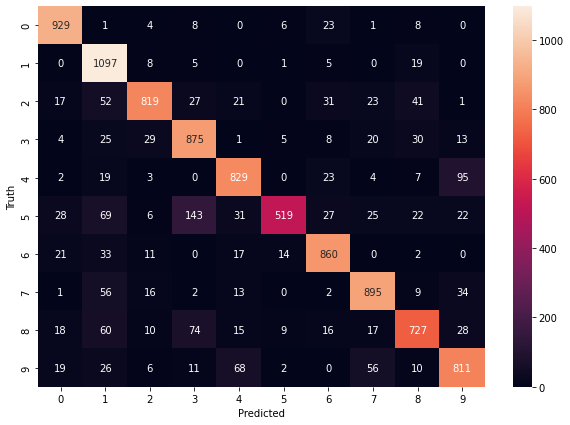

In [ ]:
#Display confusion matrix using heatmap
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


USING HIDDEN LAYER

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1676 - accuracy: 0.7195
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4872 - accuracy: 0.8730
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3817 - accuracy: 0.8952
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3390 - accuracy: 0.9041
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3142 - accuracy: 0.9100


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2948 - accuracy: 0.9157


[0.2947874367237091, 0.9157000184059143]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted

array([[1.1535409e-01, 1.4004111e-04, 6.3337058e-02, ..., 9.9920583e-01,
        2.2865534e-02, 7.9084659e-01],
       [5.3016019e-01, 6.8296790e-03, 9.9776399e-01, ..., 2.4016390e-07,
        4.2071107e-01, 2.0038285e-06],
       [3.8573146e-04, 9.6443188e-01, 2.7402323e-01, ..., 1.1418381e-01,
        7.6627940e-02, 2.3055524e-02],
       ...,
       [1.4448166e-04, 2.4423003e-04, 3.4985840e-03, ..., 5.8472127e-02,
        4.6040332e-01, 8.8349861e-01],
       [5.1131010e-02, 5.3733587e-03, 4.4856369e-03, ..., 6.0200691e-04,
        8.1902683e-01, 5.9213936e-03],
       [7.2334981e-01, 5.1892027e-07, 7.2388291e-01, ..., 1.4533049e-06,
        1.9608468e-02, 7.2002411e-04]], dtype=float32)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [ ]:
y_predicted[0]

array([1.1535409e-01, 1.4004111e-04, 6.3337058e-02, 6.1020261e-01,
       4.6900511e-03, 5.8895946e-02, 2.6440588e-05, 9.9920583e-01,
       2.2865534e-02, 7.9084659e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

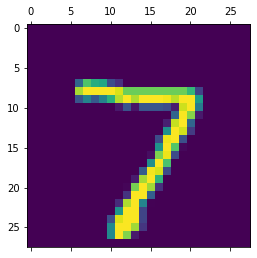

In [ ]:
plt.matshow(X_test[0])

USING FLATTEN LAYER TO CONVERT 2D to 1D

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2424 - accuracy: 0.7075
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5189 - accuracy: 0.8683
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3968 - accuracy: 0.8916
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3510 - accuracy: 0.9016
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3265 - accuracy: 0.9072
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3102 - accuracy: 0.9112
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2974 - accuracy: 0.9150
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2873 - accuracy: 0.9176
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2783 - accuracy: 0.9195
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.269

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2619 - accuracy: 0.9257


[0.261871874332428, 0.9257000088691711]